### this is used to calculate the information loss of the data after filterin
to check if the filering affect the information content

In [2]:
import numpy as np
import mne
import matplotlib.pyplot as plt
import math
from golomb_code import encode, decode

In [14]:
## loading the filtered data
file = '4b5c_nofilter.edf'
data1 = mne.io.read_raw_edf(file)
data1.info
## only the important four channels are loaded and the noisy ones are discarded

Extracting EDF parameters from /home/ifire/EEG/H-IoT-Golob-Rice-Compression-Automation/EEG data/4b5c_nofilter.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


Measurement date,"April 27, 2022 07:50:40 GMT"
Experimenter,Unknown
Participant,X
Digitized points,Not available
Good channels,6 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,125.00 Hz
Highpass,0.00 Hz
Lowpass,62.50 Hz


Setting up low-pass filter at 60 Hz

IIR filter parameters
---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 40 (effective, after forward-backward)
- Cutoff at 60.00 Hz: -6.02 dB



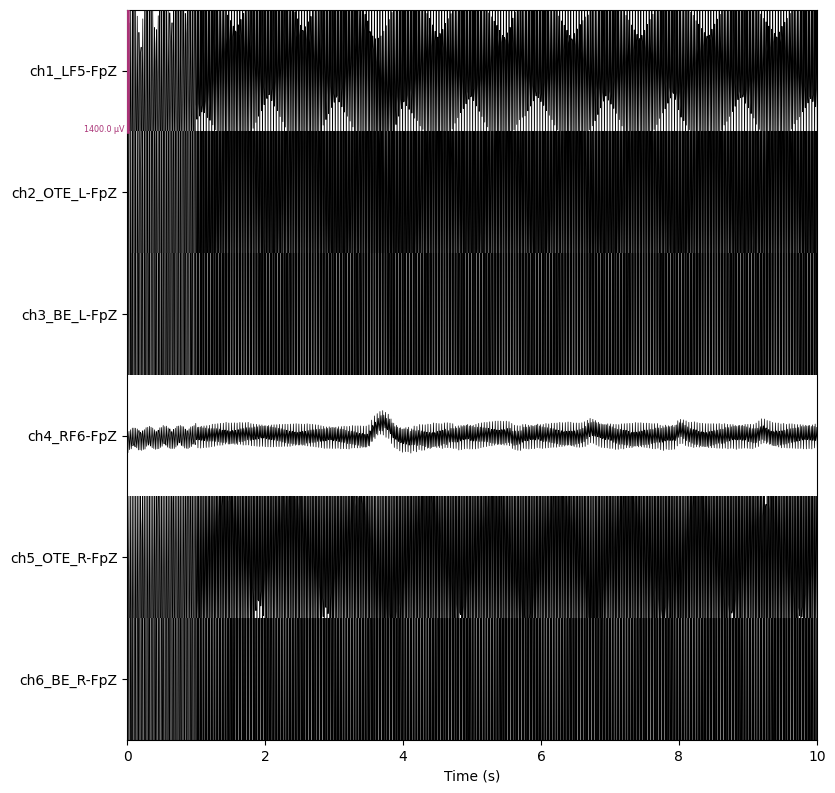

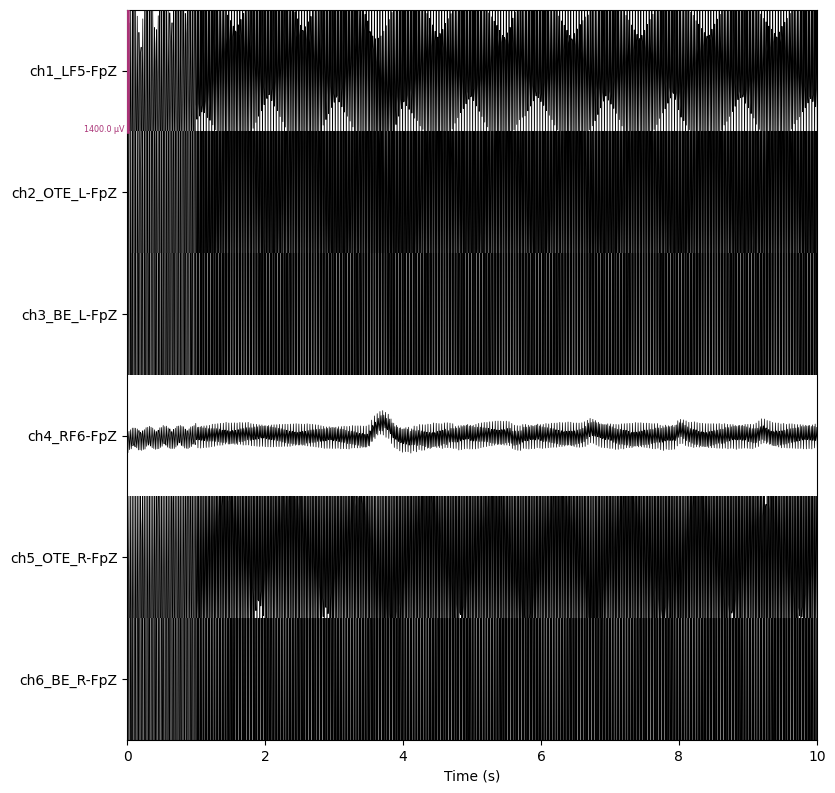

In [15]:
data1.plot( scalings='0.0007', clipping=0.5, remove_dc=True, lowpass =60, show_scrollbars=False, filtorder = 20, theme='auto')

In [18]:
# Extract data from Raw object
data_array, times = data1.get_data(return_times=True)

# Now filter the data
filtered_data = mne.filter.filter_data(data_array, 125, 0, 30, picks=[0, 1, 4, 5])


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 55 samples (0.440 s)



In [25]:
filtered_data_mne = mne.io.RawArray(filtered_data, data1.info)

Creating RawArray with float64 data, n_channels=6, n_times=152875
    Range : 0 ... 152874 =      0.000 ...  1222.992 secs
Ready.


Setting up low-pass filter at 60 Hz

IIR filter parameters
---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 40 (effective, after forward-backward)
- Cutoff at 60.00 Hz: -6.02 dB



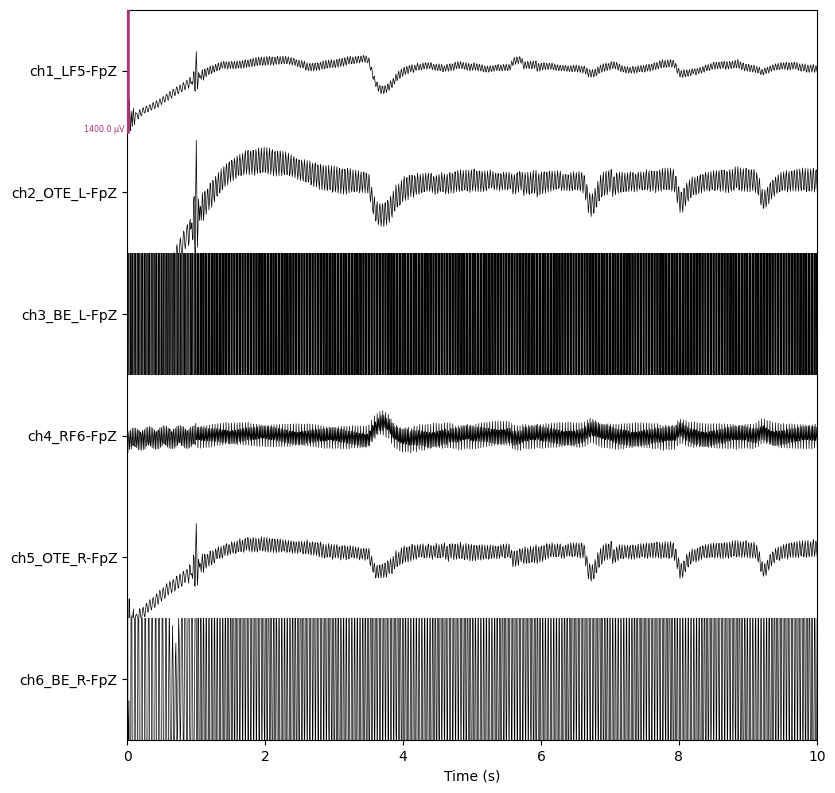

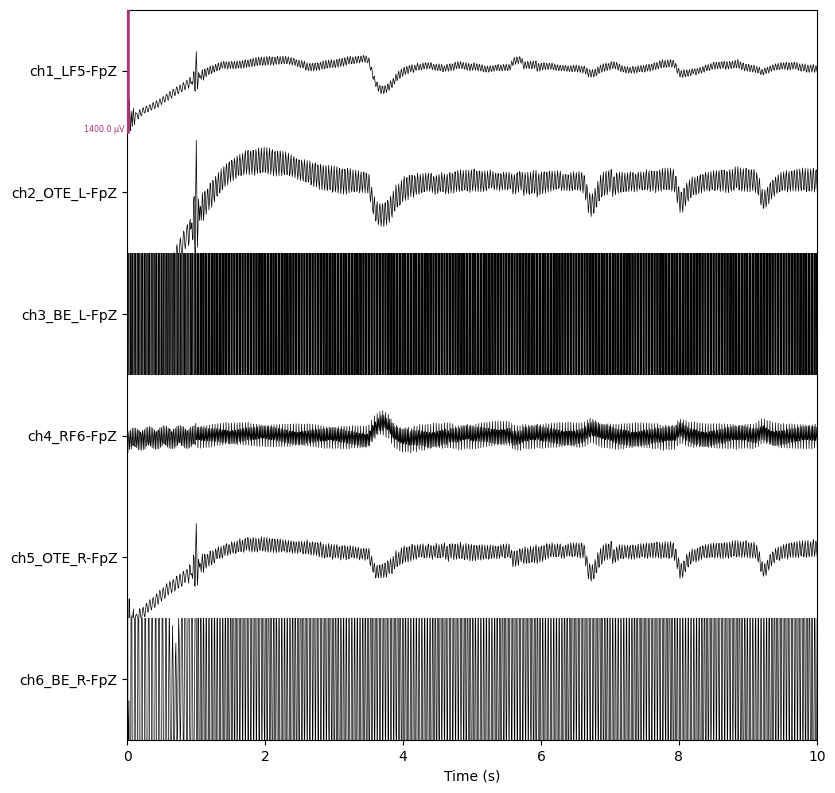

In [28]:
filtered_data_mne.plot( scalings='0.0007', clipping=0.5, remove_dc=True, lowpass =60, show_scrollbars=False, filtorder = 20, theme='auto')


## i thin it seems that the best way to filter the data is using the polyman software as this filetered data doesn't look good(using the mne library)